Self implemented Neural Network Architecure as baseline

In [1]:
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.nn.functional as F

Class Counter: 4
Class Names: ['DEER', 'FOX', 'SQUIRREL', 'WOLF']
Device: cuda


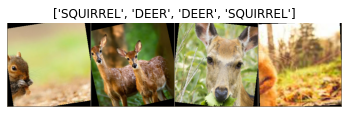

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, optim, lr_scheduler, visualize_model, losses

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 200

In [4]:
# Define neural network // CNN
class Network(nn.Module): 
    #''' Models a simple Convolutional Neural Network'''

    def __init__(self):
    #''' initialize the network '''
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)      
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(64, 4)
    
    def forward(self, x):        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)        
        return x

In [5]:
model = Network()
print(model)

Network(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=64, out_features=4, bias=True)
)


In [6]:
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, CLASS_COUNTER)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

Epoch 0/199
----------
[TRAIN] Loss: 1.3108 Acc: 0.3704 F1-Score: 0.0836 Precision: 0.1169 Recall: 0.0926
[VALID] Loss: 1.2563 Acc: 0.3891 F1-Score: 0.0718 Precision: 0.1040 Recall: 0.0974

Epoch 1/199
----------
[TRAIN] Loss: 1.2434 Acc: 0.3907 F1-Score: 0.0773 Precision: 0.1067 Recall: 0.0977
[VALID] Loss: 1.2422 Acc: 0.3998 F1-Score: 0.0831 Precision: 0.1172 Recall: 0.0999

Epoch 2/199
----------
[TRAIN] Loss: 1.2343 Acc: 0.3859 F1-Score: 0.0770 Precision: 0.1069 Recall: 0.0974
[VALID] Loss: 1.2263 Acc: 0.4069 F1-Score: 0.0855 Precision: 0.1156 Recall: 0.1018

Epoch 3/199
----------
[TRAIN] Loss: 1.2134 Acc: 0.3919 F1-Score: 0.0822 Precision: 0.1205 Recall: 0.0980
[VALID] Loss: 1.2155 Acc: 0.3974 F1-Score: 0.0795 Precision: 0.1096 Recall: 0.0994

Epoch 4/199
----------
[TRAIN] Loss: 1.2082 Acc: 0.3978 F1-Score: 0.0817 Precision: 0.1122 Recall: 0.0995
[VALID] Loss: 1.2095 Acc: 0.3986 F1-Score: 0.0787 Precision: 0.1114 Recall: 0.0997

Epoch 5/199
----------
[TRAIN] Loss: 1.2051 Acc: 0

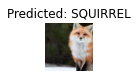

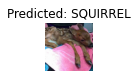

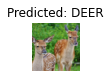

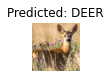

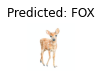

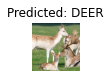

In [7]:
base_model = train_model(model,"baseline", criterion, optimizer, step_lr_scheduler, NUM_EPOCHS)
visualize_model(base_model)
plt.show()

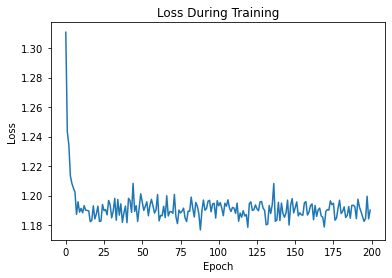

In [8]:
plt.plot(losses, '-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training');

In [9]:
base_model = test_model(base_model, criterion)

[TEST] Loss: 1.1699 Acc: 0.3274 F1-Score: 0.0623 Precision: 0.0952 Recall: 0.0822
Test complete in 0m 3s
